In [1]:
import scanpy as sc

In [2]:
import scvi

Global seed set to 0


In [26]:
scvi.settings.seed = 0

Global seed set to 0


In [27]:
adata=sc.read('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects-new/all_samples_raw.h5ad')

In [28]:
adata.obs['study']=adata.obs['study'].astype(str)
#adata.obs['groups']="group_" + adata2.obs['groups1']

In [26]:
adata.obs['study'].value_counts()

8_CTCL          277158
healthy_skin    206950
psoriasis       134492
AD              124938
HRJ              60164
NC               49634
prj              32623
Name: study, dtype: int64

In [29]:
old_to_new = {
    'healthy_skin': 'skin_atlas',
    'psoriasis': 'skin_atlas',
    'AD': 'skin_atlas',
    '8_CTCL': '8_CTCL',
    'HRJ': 'HRA',
    'prj': 'PRJ',
    'NC': 'NC'
}
adata.obs['study2'] = (
    adata.obs['study']
    .map(old_to_new)
    .astype('category')
)

In [7]:
adata.obs

,Sanger_ID,tissue,site,Sex,batch,n_counts,n_genes,percent_mito,study,donor,tech,sample_type,study2
AAACCTGAGAAGCCCA-0_CTCL1_CTCL1_CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,9657.0,2766,0.002692,8_CTCL,CTCL1,10x,ctcl,8_CTCL
AAACCTGAGAATGTTG-0_CTCL1_CTCL1_CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,7317.0,3106,0.000547,8_CTCL,CTCL1,10x,ctcl,8_CTCL
AAACCTGAGCCAACAG-0_CTCL1_CTCL1_CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,2564.0,633,0.003510,8_CTCL,CTCL1,10x,ctcl,8_CTCL
AAACCTGAGCGTTCCG-0_CTCL1_CTCL1_CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,1501.0,979,0.039307,8_CTCL,CTCL1,10x,ctcl,8_CTCL
AAACCTGAGTACGTTC-0_CTCL1_CTCL1_CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,31221.0,4356,0.009833,8_CTCL,CTCL1,10x,ctcl,8_CTCL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGTATTGAGCTAGTCT-92_S5,SKN8105200,Dermis,non_lesion,Female,92,1009.0,511,0.100099,healthy_skin,S5,10x,healthy_skin,skin_atlas
GGGTCTGTCAGAGCTT-92_S5,SKN8105200,Dermis,non_lesion,Female,92,1005.0,454,0.169154,healthy_skin,S5,10x,healthy_skin,skin_atlas
TCGAGGCCAAGGGTCA-92_S5,SKN8105200,Dermis,non_lesion,Female,92,1007.0,411,0.004965,healthy_skin,S5,10x,healthy_skin,skin_atlas
CCTTCGACAGGCTGAA-92_S5,SKN8105200,Dermis,non_lesion,Female,92,1003.0,643,0.133599,healthy_skin,S5,10x,healthy_skin,skin_atlas


In [8]:
#adata.obs["donor"]=adata.obs["donor"].astype(str)
#adata.obs.index= adata.obs.index + "_" + adata.obs["donor"]

In [38]:
adata.layers['raw_counts']=adata.X.copy()

In [39]:
adata

AnnData object with n_obs × n_vars = 885959 × 15777
    obs: 'Sanger_ID', 'tissue', 'site', 'Sex', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'study', 'donor', 'tech', 'sample_type'
    layers: 'raw_counts'

In [10]:
#adata2=adata.copy()

KeyboardInterrupt: 

In [40]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=3000,
    layer="raw_counts",
    batch_key="donor",
    span=1,
    subset=True,
)

In [41]:
scvi.model.SCVI.setup_anndata(adata, layer="raw_counts", batch_key='donor', categorical_covariate_keys=['tech'])

In [42]:
model = scvi.model.SCVI(adata, n_hidden=100,  n_layers=1, n_latent=5, gene_likelihood="zinb")

In [43]:
model.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-SXM4-80GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 9/9: 100%|██████████| 9/9 [15:42<00:00, 101.52s/it, loss=851, v_num=1]

`Trainer.fit` stopped: `max_epochs=9` reached.


Epoch 9/9: 100%|██████████| 9/9 [15:42<00:00, 104.71s/it, loss=851, v_num=1]


In [45]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [46]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)

In [47]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCVI_LATENT_KEY])

/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


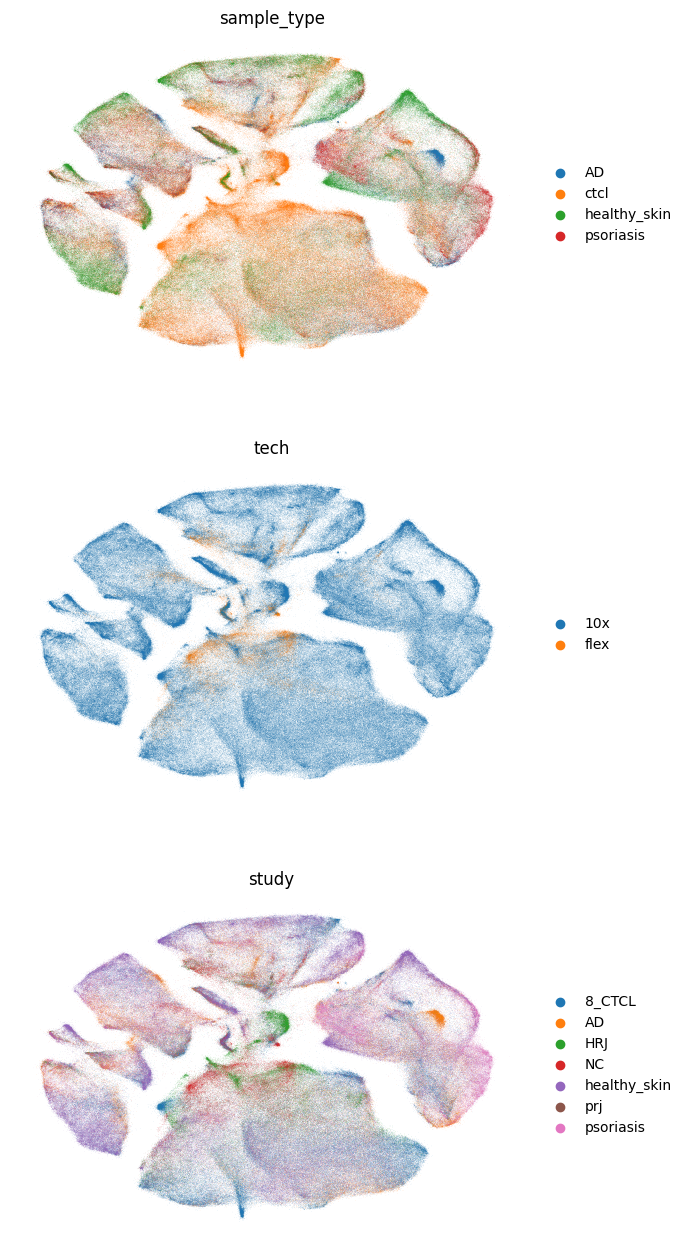

In [49]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["sample_type", "tech", "study"],
    frameon=False,
    ncols=1,
)

/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


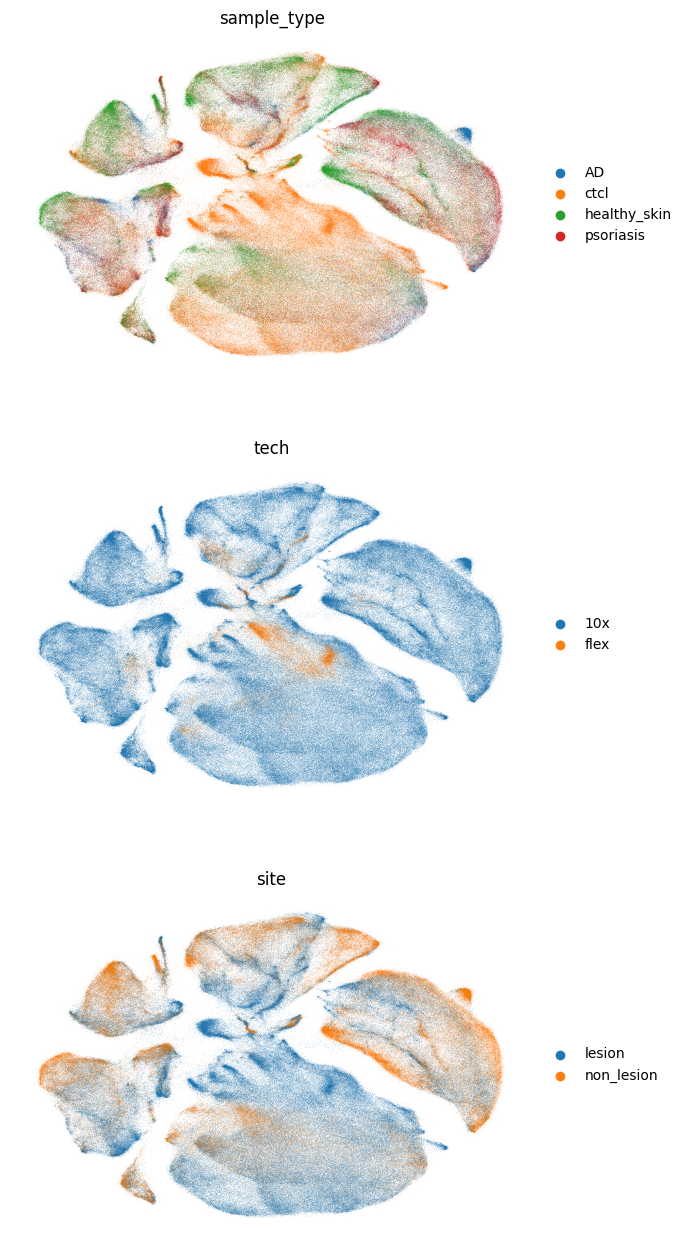

In [46]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["sample_type", "tech", "site"],
    frameon=False,
    ncols=1,
)

In [50]:
adata2=sc.read('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects-new/all_samples_raw.h5ad')

In [51]:
adata2.obsm=adata.obsm
adata2.obsp=adata.obsp
adata2.uns=adata.uns

In [42]:
adata2.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects/all_samples_scvi_4kbydonor_6dim_100hidd_study2_cov.h5ad')

In [19]:
adata3=sc.read('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects/all_samples_scvi_4kbydonor_6dim_100hidd_leiden_broad_ct.h5ad')

In [47]:
adata3.obs['study']=adata2.obs['study']

/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


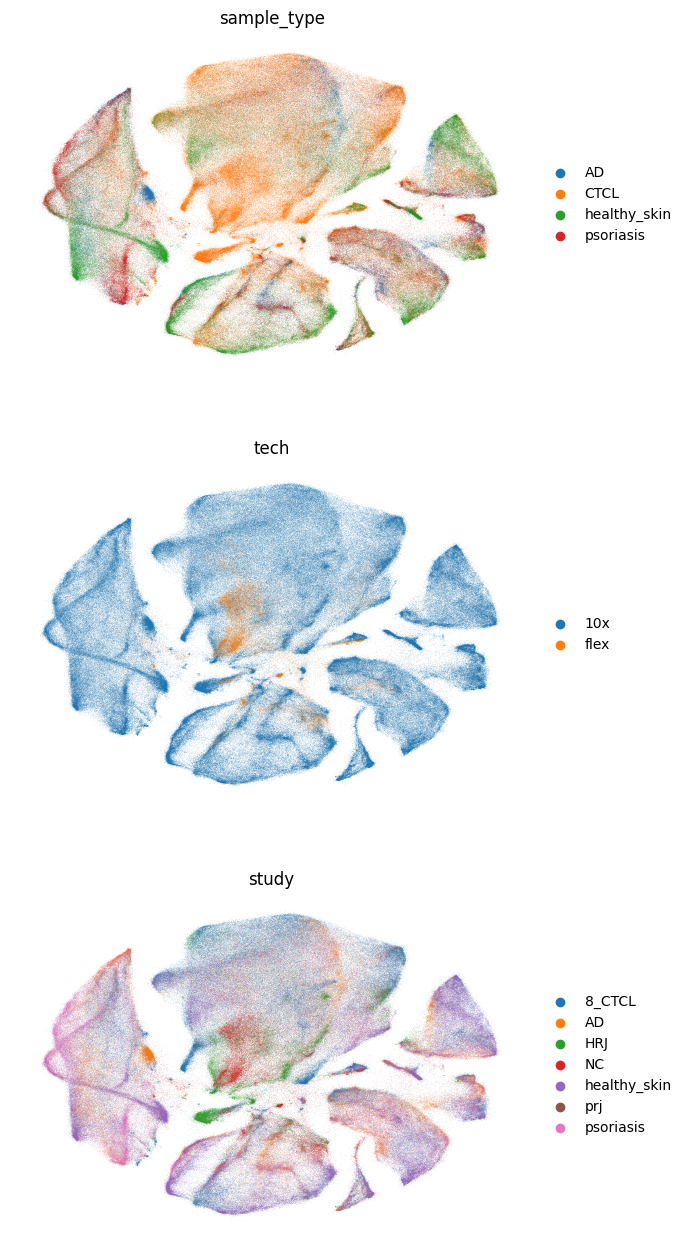

In [48]:
sc.pl.embedding(
    adata3,
    basis=SCVI_MDE_KEY,
    color=["sample_type", "tech", "study"],
    frameon=False,
    ncols=1,
)

In [52]:
adata2.obs['cell_type_broad']=adata3.obs['broad_ct']

In [53]:
adata2.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects/all_samples_scvi_3kbydonor_5dim_100hidd_tech_cov_broad_ct-transfer.h5ad')

In [54]:
sc.pp.normalize_total(adata2, target_sum=1e4)
sc.pp.log1p(adata2)

In [ ]:
sc.pl.embedding(
    adata2,
    basis=SCVI_MDE_KEY,
    color=["CD3E", "CD3D", "CD19", "CD8A", "CD79A", "KRT5", "COL1A1", "COL6A2", "CCL19", "CDH5", "PECAM1", "CD1C", "CD83", "PMEL"],
    frameon=False,
    ncols=1,
)

In [25]:
model.save('/lustre/scratch126/cellgen/team298/ab72/CTCL/allsamples_m1/', save_anndata= True )

In [26]:
adata2.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects/all_samples_scvi_4kbydonor_6dim_100hidd.h5ad')

In [28]:
sc.tl.leiden(adata2, key_added='groups1', resolution=1)

IOStream.flush timed out


In [33]:
adata2.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/objects/all_samples_scvi_4kbydonor_6dim_100hidd_leiden.h5ad')

/nfs/team298/ab72/miniconda3/envs/scvi3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


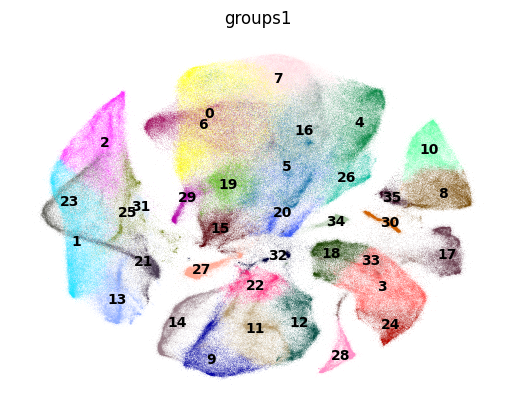

In [34]:
sc.pl.embedding(
    adata2,
    basis=SCVI_MDE_KEY,
    color=["groups1"],
    frameon=False,
    ncols=1,legend_loc= 'on data'
)